In [1]:
import pandas as pd
import folium
from folium.plugins import MarkerCluster
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport
from funpymodeling.exploratory import status, cat_vars
import numpy as np


In [2]:
# Cargar el archivo CSV en un DataFrame
csv_file_path = 'C:\\Users\\nfeli\\Documents\\Code\\TFM\\app_TFM\\fin_edu\\data\\esc_q.csv'
data = pd.read_csv(csv_file_path, sep=',')

In [3]:
status(data)

,variable,q_nan,p_nan,q_zeros,p_zeros,unique,type
0,Y,0,0.000000,0,0.0,36758,float64
1,X,0,0.000000,0,0.0,37414,float64
2,fna,0,0.000000,0,0.0,52867,object
3,gna,6655,0.103194,0,0.0,3031,object
4,nam,699,0.010839,0,0.0,45353,object
5,fun,0,0.000000,0,0.0,1,object
6,cue,0,0.000000,0,0.0,64490,int64
7,amg,0,0.000000,0,0.0,6,object
8,ges,0,0.000000,0,0.0,3,object
9,mde,1835,0.028454,0,0.0,36,object


In [4]:
# EDA - Análisis Exploratorio de Datos
len(data)


64490

array([[<Axes: title={'center': 'Y'}>, <Axes: title={'center': 'X'}>],
       [<Axes: title={'center': 'cue'}>, <Axes: >]], dtype=object)

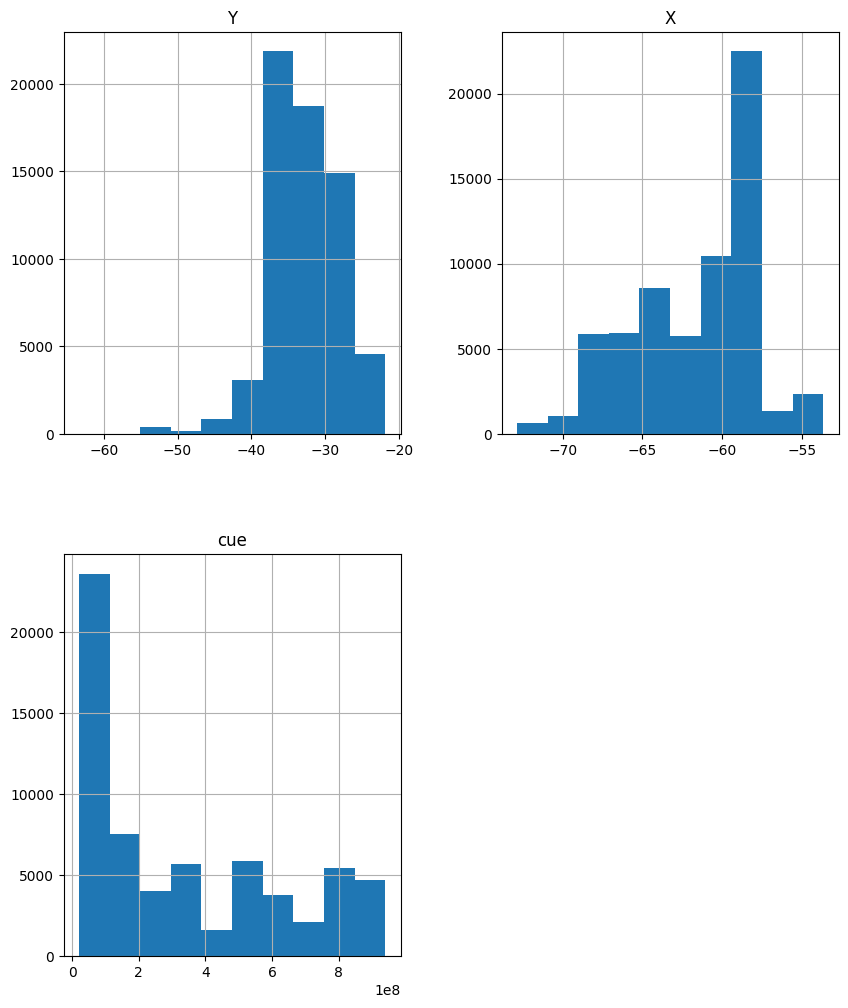

In [6]:
data.hist(figsize = (10,12))

In [7]:
ProfileReport(data, minimal=True)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:

# Asumiendo que 'data' es tu DataFrame y ya tienes columnas 'X' y 'Y' para longitud y latitud, respectivamente.
# Además, supongamos que 'fna' es el nombre completo de la institución y 'gna' es una abreviatura o categoría.

# Crear un mapa centrado en las coordenadas medias
map_center = [data['Y'].mean(), data['X'].mean()]
mapa = folium.Map(location=map_center, zoom_start=12)  # Ajusté el zoom para un mejor detalle visual

# Añadir los puntos al mapa
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['Y'], row['X']],
        popup=f"{row['fna']} ({row['gna']})"
    ).add_to(mapa)

# Mostrar el mapa en el notebook
display(mapa)


In [ ]:
# Visualización en un mapa usando Folium

# Extraer las coordenadas
data[['longitude', 'latitude']] = data['geom'].str.extract(r'POINT\(([^ ]+) ([^ ]+)\)')
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].astype(float)

# Crear un mapa centrado en las coordenadas medias
map_center = [data['latitude'].mean(), data['longitude'].mean()]
mapa = folium.Map(location=map_center, zoom_start=5)

# Añadir los puntos al mapa
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['fna']} ({row['gna']})"
    ).add_to(mapa)

# Mostrar el mapa en el notebook
display(mapa)

In [ ]:

# Visualización en un mapa usando Folium

# Extraer las coordenadas
data[['longitude', 'latitude']] = data['geom'].str.extract(r'POINT\(([^ ]+) ([^ ]+)\)')
data['longitude'] = data['longitude'].astype(float)
data['latitude'] = data['latitude'].astype(float)

# Crear un mapa centrado en las coordenadas medias
map_center = [data['latitude'].mean(), data['longitude'].mean()]
mapa = folium.Map(location=map_center, zoom_start=5)

# Añadir un MarkerCluster para agrupar los puntos
marker_cluster = MarkerCluster().add_to(mapa)

# Añadir los puntos al mapa
for idx, row in data.iterrows():
    folium.Marker(
        location=[row['latitude'], row['longitude']],
        popup=f"{row['fna']} ({row['gna']})"
    ).add_to(marker_cluster)

# Guardar el mapa en un archivo HTML
mapa.save('mapa_puntos_de_ciencia_y_educacion.html')
print("Mapa guardado como 'mapa_puntos_de_ciencia_y_educacion.html'")

# Abrir el mapa en el navegador automáticamente (opcional)
import webbrowser
webbrowser.open('mapa_puntos_de_ciencia_y_educacion.html')

